# H-1B Visa Program Analysis

According to USCIS's offficial site, the H-1B program enables employers in the United States to employ foreign employees in speciality occupations that often required some specialized knowledge or training.   

Many foreign employees, including international students who have been studying in the State, often try their luck in this competitive program to work and live in the State. 

In this notebook, I will do two-part analysis using open-source data from USCIS's website to learn more about H-1B Visa Program in general & explore the data from most recent year to gain insights on the chances that H-1B Visa Program offers to a recent Computer Science graduate in Los Angeles.

### How to run the code

This is an executable Juputer notebook hosted on [Jovian.ml](https://jovian.ai/kyawhtetwin/h1b-visa-petitions), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## 1. Downloading & Preparing the Original Dataset

We will learn about H-1B program for the past decade (2012-2022) using the open-source dataset available on USCIS's website that can be found [here.](https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files)

The data is available in CSV file format for each year. It contains 11 columns and here is what they mean:
1. **Fiscal Year**: The fiscal year ranges from Oct 1 of one year to Sept 30 of next year in US.
2. **Employer Name**: Name of the employer. An employer with multiple addresses can appear on many rows. 
3. **Initial Approval(IA)**: Number of H-1B petitions that are approved for new employment or new concurrent employment (i.e. filing for H-1B petitions via second employer while already having a valid H-1B status). 
4. **Initial Denial(ID)**: Number of H-1B petitions that are denied for new employment or new concurrent employment.
5. **Continuing Approval(CA)**: Number of H-1B petitions that are approved other than new employment/new concurrent employment. For example, when changing an employer. Refer to official website for other scenarios.
6. **Continuing Denial(CD)**: Number of H-1B petitions that are denied other than new employment/new concurrent employment. For example, when changing an employer. Refer to official website for other scenarios. 
7. **NAICS**: North American Industry Classification System Code. The standard two-digit code in North America used to classify the industry to which a business belongs. 
8. **Tax ID**: Last four digit of employer's Tax ID
9. **State**: The state in which employer resides. 
10. **City**: The city in which employer resides.
11. **Zip**: The zip code in which employer resides.

> Downloading the dataset
> - I will retrieve the links to csv files from the site and download it using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

Since the two-digit NAICS code isn't quite infromative, first let's figure out which industries they represent. Find out more about NAICS [here](https://www.census.gov/naics/?58967?yearbck=2022)

In [1]:
NAICS_CODE_2022 = {
    11: "Agriculture, Forestry, Fishing, and Hunting",
    21: "Mining, Quarrying, and Oil and Gas Extraction",
    22: "Utilities",  23: "Construction",
    31: "Manufacturing", 32: "Manufacturing", 33: "Manufacturing",
    42: "Wholesale Trade", 
    44: "Retail Trade", 45: "Retail Trade",
    48: "Transportation and Warehousing", 49: "Transportation and Warehousing",
    51: "Information", 52: "Finance and Insurance",
    53: "Real Estate and Rental and Leasing", 
    54: "Professional, Scientific, and Technical Services", 
    55: "Management of Companies and Enterprises",
    56: "Administrative and Support and Waste Management and Remediation Services", 
    61: "Educational Services", 62: "Health Care and Social Assistance", 
    71: "Arts, Entertainment, and Recreation", 72: "Accommodation and Food Services",
    81: "Other Services (except PA)", 92: "Public Administration(PA)",
    99: "Unknown"
}

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
dataset_urls = ['https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2022.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2021.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2020.csv', 
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2019.csv', 
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2018.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2017.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2016.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2015.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2014.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2013.csv',
                'https://www.uscis.gov/sites/default/files/document/data/h1b_datahubexport-2012.csv']

In [4]:
import opendatasets as od
for dataset_url in dataset_urls:
    od.download(dataset_url)

Using downloaded and verified file: ./h1b_datahubexport-2022.csv
Using downloaded and verified file: ./h1b_datahubexport-2021.csv
Using downloaded and verified file: ./h1b_datahubexport-2020.csv
Using downloaded and verified file: ./h1b_datahubexport-2019.csv
Using downloaded and verified file: ./h1b_datahubexport-2018.csv
Using downloaded and verified file: ./h1b_datahubexport-2017.csv
Using downloaded and verified file: ./h1b_datahubexport-2016.csv
Using downloaded and verified file: ./h1b_datahubexport-2015.csv
Using downloaded and verified file: ./h1b_datahubexport-2014.csv
Using downloaded and verified file: ./h1b_datahubexport-2013.csv
Using downloaded and verified file: ./h1b_datahubexport-2012.csv


The dataset has been downloaded and extracted.

In [6]:
import pandas as pd
from pandas.api.types import is_numeric_dtype
import numpy as np

In [7]:
# In some years, the column names are slightly different. So, let me standardized it with my own column names
files = ['h1b_datahubexport-2022.csv', 'h1b_datahubexport-2021.csv', 'h1b_datahubexport-2020.csv',
         'h1b_datahubexport-2019.csv', 'h1b_datahubexport-2018.csv', 'h1b_datahubexport-2017.csv',
         'h1b_datahubexport-2016.csv', 'h1b_datahubexport-2015.csv', 'h1b_datahubexport-2014.csv',
         'h1b_datahubexport-2013.csv', 'h1b_datahubexport-2012.csv'
        ]
column_names = ["Fiscal Year","Employer","IA","ID","CA","CD","NAICS","Tax ID","State","City","ZIP"]
for file in files:
    df = pd.read_csv(file)
    df.columns = column_names
    # Sometimes, numeric columns like IA, ID, CA, CD doens't have numeric type because of comma. To prevent that:
    colnames = ['IA', 'ID', 'CA', 'CD']
    for col_name in colnames:
        if not is_numeric_dtype(df[col_name]):
            df[col_name]= df[col_name].apply(lambda x: x.replace(",", "")).astype(int)
    df.to_csv(file, index=False)

Let us save and upload our work to Jovian before continuing.

In [8]:
project_name = "h1b_visa_petitions" 

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/h1b-visa-petitions" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kyawhtetwin/h1b-visa-petitions


'https://jovian.ai/kyawhtetwin/h1b-visa-petitions'

## 2. Data Preparation and Cleaning

Now that we have downloaded data into our current directory, let's look at the data from a year to see what pre-processing steps we need to take before combining data from all the years into one table (DataFrame).



In [11]:
# Read from one year & examine some rows
h1b_22_df = pd.read_csv('h1b_datahubexport-2022.csv')
h1b_22_df.sample(5)

,Fiscal Year,Employer,IA,ID,CA,CD,NAICS,Tax ID,State,City,ZIP
15073,2022,FINPLICITY INC,0,0,1,0,54,216.0,PA,PHILADELPHIA,19146.0
4086,2022,ATRUTEC LLC,1,0,0,0,54,8873.0,TX,DALLAS,75287.0
33060,2022,RAMSONS INNOVATIONS,1,0,0,0,54,9430.0,TX,IRVING,75062.0
40024,2022,TEXAS BIOMEDICAL RESEARCH INSTITUTE,0,0,2,0,54,9630.0,TX,SAN ANTONIO,78227.0
39236,2022,TAPRESEARCH INC,0,0,1,0,54,6899.0,CA,MENLO PARK,94025.0


In [12]:
# Let's find out more about the columns
h1b_22_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46215 entries, 0 to 46214
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fiscal Year  46215 non-null  int64  
 1   Employer     46211 non-null  object 
 2   IA           46215 non-null  int64  
 3   ID           46215 non-null  int64  
 4   CA           46215 non-null  int64  
 5   CD           46215 non-null  int64  
 6   NAICS        46215 non-null  int64  
 7   Tax ID       46090 non-null  float64
 8   State        46214 non-null  object 
 9   City         46214 non-null  object 
 10  ZIP          46210 non-null  float64
dtypes: float64(2), int64(6), object(3)
memory usage: 3.9+ MB


We notice some columns with missing rows. These need to be handled.

In [13]:
# Find out the counts of unique Tax ID
h1b_22_df['Tax ID'].value_counts()

3200.0    51
3536.0    39
4687.0    32
6464.0    25
8140.0    20
          ..
2125.0     1
1499.0     1
8196.0     1
5688.0     1
976.0      1
Name: Tax ID, Length: 9786, dtype: int64

In [15]:
# Let's see some data for a Tax ID
h1b_22_df[h1b_22_df['Tax ID'] == 8140.0].head(12)

,Fiscal Year,Employer,IA,ID,CA,CD,NAICS,Tax ID,State,City,ZIP
1495,2022,AIRLINE TARIFF PUBLISHING CO ATPCO,0,0,1,0,54,8140.0,VA,STERLING,20166.0
2569,2022,AMNEAL PHARMACEUTICALS OF NEW YORK LLC,1,0,10,0,32,8140.0,NJ,BRIDGEWATER,8807.0
2570,2022,AMNEAL PHARMACEUTICALS OF NEW YORK LLC,0,0,2,0,32,8140.0,NY,BROOKHAVEN,11719.0
2571,2022,AMNEAL PHARMACEUTICALS OF NY LLC,0,0,1,0,32,8140.0,NJ,BRIDGEWATER,8807.0
2572,2022,AMNEAL PHARMACEUTICALS OF NY LLC,0,0,2,0,32,8140.0,NY,BROOKHAVEN,11719.0
3062,2022,APPLICATIONS SOFTWARE TECH LLC,4,0,12,1,54,8140.0,IL,LISLE,60532.0
3063,2022,APPLICATIONS SOFTWARE TECH LLC,0,0,1,0,54,8140.0,IL,NAPERVILLE,60563.0
3064,2022,APPLICATIONS SOFTWARE TECHNOLOGY LLC,5,0,14,1,54,8140.0,IL,LISLE,60532.0
3065,2022,APPLICATIONS SOFTWARE TECHNOLOGY LLC,0,0,1,0,54,8140.0,IL,NAPERVILLE,60563.0
3677,2022,ASCENDATA LLC,1,0,0,0,54,8140.0,PA,PHILADELPHIA,19146.0


I identify Four Preprocessing Steps to apply:
1. Finding the total number of petitions by each company at different locations (i.e. new column)
2. Replacing NAICS code with the industry that they represent
3. Removing the rows with missing location information (City, State, or Zip). Since most of our queries are geographical in nature, missing rows here doesn't help much
4. Replacing the missing employers with label Unknown

**NOTE:** Notice from filtering by Tax ID: 'AMNEAL PHARMACEUTICALS OF NEW YORK LLC' & 'AMNEAL PHARMACEUTICALS OF NY LLC' are going to be treated as different employers even though they are actually the same employer. So, the numbers that we see later might undercount a little bit	

Let's write a function to take care of all preprocessing step

In [16]:
def preprocess_h1b_data(data, naics_code):
    data['TP'] = data['IA'] + data['ID'] + data['CA'] + data['CD']
    data.replace({'NAICS': naics_code}, inplace=True)
    data.dropna(subset=['State', 'City', 'ZIP'], inplace=True)
    data['Employer'].fillna('Unknown', inplace=True)
    return data

In [17]:
# Let's see the results
h1b_22_transformed = preprocess_h1b_data(h1b_22_df, NAICS_CODE_2022)
h1b_22_transformed.sample(5)

,Fiscal Year,Employer,IA,ID,CA,CD,NAICS,Tax ID,State,City,ZIP,TP
26230,2022,MIDDLETON-CROSS PLAINS AREA SCHOOL,1,0,0,0,Educational Services,780.0,WI,MIDDLETON,53562.0,1
43842,2022,VINCE LLC,1,0,1,0,Retail Trade,7936.0,NY,NEW YORK,10110.0,2
14638,2022,FAITH REGIONAL PHYSICIAN SERVICES,0,0,1,0,Health Care and Social Assistance,9846.0,NE,NORFOLK,68701.0,1
23781,2022,LIFEFOUNDRY INC,1,0,0,0,Manufacturing,6184.0,IL,CHAMPAIGN,61820.0,1
23248,2022,LARSON LLP,0,0,1,0,"Professional, Scientific, and Technical Services",9680.0,CA,LOS ANGELES,90071.0,1


In [18]:
h1b_22_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46209 entries, 0 to 46214
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fiscal Year  46209 non-null  int64  
 1   Employer     46209 non-null  object 
 2   IA           46209 non-null  int64  
 3   ID           46209 non-null  int64  
 4   CA           46209 non-null  int64  
 5   CD           46209 non-null  int64  
 6   NAICS        46209 non-null  object 
 7   Tax ID       46084 non-null  float64
 8   State        46209 non-null  object 
 9   City         46209 non-null  object 
 10  ZIP          46209 non-null  float64
 11  TP           46209 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 4.6+ MB


Since the results look good, I will apply the same preprocessing steps to all years & then combine them into one DataFrame.

In [19]:
files = ['h1b_datahubexport-2022.csv', 'h1b_datahubexport-2021.csv', 'h1b_datahubexport-2020.csv',
         'h1b_datahubexport-2019.csv', 'h1b_datahubexport-2018.csv', 'h1b_datahubexport-2017.csv',
         'h1b_datahubexport-2016.csv', 'h1b_datahubexport-2015.csv', 'h1b_datahubexport-2014.csv',
         'h1b_datahubexport-2013.csv', 'h1b_datahubexport-2012.csv'
        ]
preprocessed_dfs = []
for file in files:
    df = pd.read_csv(file)
    preprocessed_df = preprocess_h1b_data(df, NAICS_CODE_2022)
    preprocessed_dfs.append(preprocessed_df)
combined_h1b_data = pd.concat(preprocessed_dfs)

In [20]:
# Let's see how many samples we get
combined_h1b_data.shape

(597637, 12)

In [21]:
combined_h1b_data.sample(10)

,Fiscal Year,Employer,IA,ID,CA,CD,NAICS,Tax ID,State,City,ZIP,TP
28138,2012,TRINITY PHARMA SOLUTIONS LLC,1,0,0,0,"Professional, Scientific, and Technical Services",6478.0,MA,WALTHAM,2453.0,1
28906,2015,ROCKIT RECRUITING LLC,0,0,0,1,Administrative and Support and Waste Managemen...,8858.0,CA,SAN FRANCISCO,94107.0,1
47013,2016,ATHENA TECHNOLOGY INC,2,1,1,0,"Professional, Scientific, and Technical Services",3426.0,CA,FREMONT,94539.0,4
46520,2015,SINGAPORE TELECOM USA INC,0,0,1,0,Unknown,8580.0,CA,REDWOOD CITY,94065.0,1
14265,2021,D FOCUS AMERICA INC,0,0,1,0,"Professional, Scientific, and Technical Services",3774.0,NJ,PALISADES PARK,7650.0,1
51109,2021,SYNTEGRA INC,0,0,1,0,Information,8711.0,CA,SAN MATEO,94404.0,1
44213,2015,PEORIA UNIFIED SCHOOL DISTRICT 11,2,0,2,0,Educational Services,488.0,AZ,GLENDALE,85306.0,4
28,2015,ONRAMP TECHNOLOGIES LLC D B ACHANN,1,0,0,0,"Professional, Scientific, and Technical Services",NaN,IL,CHICAGO,60603.0,1
10443,2016,FLEXTECS LLC,0,0,1,0,"Professional, Scientific, and Technical Services",7124.0,GA,ATLANTA,30327.0,1
5722,2018,COLUMBIA UNIVERSITY,76,0,30,0,Educational Services,8093.0,NY,NEW YORK,10032.0,106


In [22]:
# Saving the dataset
combined_h1b_data.to_csv("h1b_2012_2022.csv", index=False)

In [23]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/h1b-visa-petitions" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kyawhtetwin/h1b-visa-petitions


'https://jovian.ai/kyawhtetwin/h1b-visa-petitions'

## 3. Part 1: Asking Big Picture Questions

**In this section, we will ask and explore big-picture questions about H-1B Visa Program.** 



Let's begin by importing`matplotlib.pyplot` and `seaborn`. Along with `pandas` and `numpy`.

In [25]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (14, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [26]:
# Uncomment & read data from here if you didn't go through the first two steps
# combined_h1b_data = pd.read_csv("h1b_2012_2022.csv")

In [27]:
fiscal_years = combined_h1b_data['Fiscal Year'].unique()[::-1]

In [28]:
fiscal_years

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [37]:
num_years = fiscal_years.size

In [29]:
# Seeing some samples
combined_h1b_data.sample(5)

,Fiscal Year,Employer,IA,ID,CA,CD,NAICS,Tax ID,State,City,ZIP,TP
52923,2013,CARL ZEISS VISION INC,0,0,2,0,Manufacturing,9941.0,CA,SAN DIEGO,92131.0,2
39557,2019,BORDERFREE INC,1,0,0,0,Retail Trade,6062.0,CT,SHELTON,6484.0,1
2333,2018,GENERAL CABLE INDUSTRIES INC,2,0,2,0,Manufacturing,9714.0,KY,NEWPORT,41076.0,4
26057,2021,INFOMATICS INC,1,0,0,0,"Professional, Scientific, and Technical Services",9036.0,MI,FARMINGTON HILLS,48331.0,1
24507,2015,ADVANCED TECH GROUP USA INC,1,0,0,0,"Professional, Scientific, and Technical Services",6910.0,MI,TROY,48098.0,1


**Question: Is there any correlation for an employer between getting an Initial Approval & Continuing Approval?** 

In [30]:
corr = combined_h1b_data.groupby(by='Employer')[['IA', 'CA']].sum().corr()
corr.style.background_gradient(cmap='coolwarm')

,IA,CA
IA,1.000000,0.866720
CA,0.866720,1.000000


**There seems to be a strong linear correlation. Employers who filed H-1B for new/concurrent employment and are approved are also likely to get approved when filing for continuing type of employment.**

**Question:How has the total number of H1-B petitions filed changed over the years?**

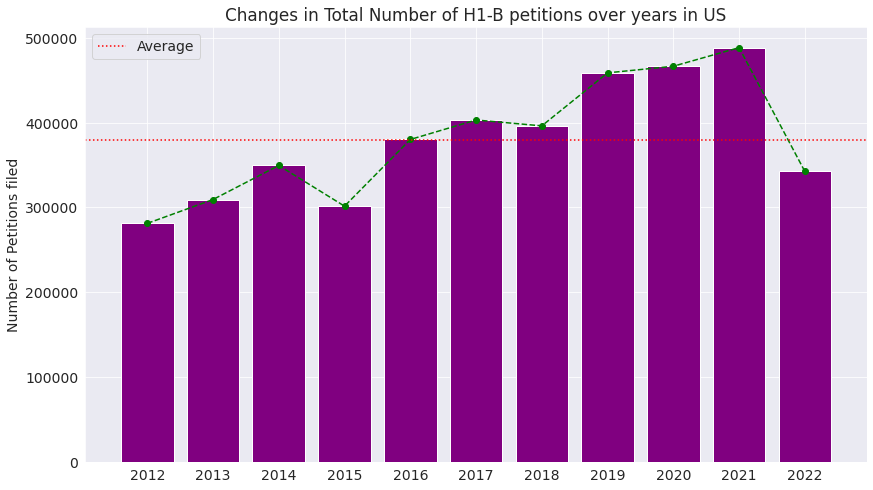

In [136]:
tp_yearly = combined_h1b_data.groupby(by=['Fiscal Year'])['TP'].sum()
average = tp_yearly.mean()
plt.bar(x=tp_yearly.index, height=tp_yearly.values, color='purple')
plt.plot(tp_yearly.index, tp_yearly.values, "o--g")
plt.axhline(y = average, color = 'red', linestyle = ':', label = "Average")
plt.title("Changes in Total Number of H1-B petitions over years in US")
plt.ylabel("Number of Petitions filed")
plt.legend()
plt.xticks(fiscal_years);

**Observation:<br>
While the total number of H-1B petitions have generally been on the rise in the last decade, peaking in 2021, there has been a sharp decline of H-1B filing in the most recent year 2022, even falling before the average of the last decade since 2015. However, since I am conducting the analysis in Dec 2022, we don't quite have complete data for 2022 fiscal year. It might be in fact turns out to be around the decade average (or not). Although the number of petitions are likely to be much fewer compared to last 3 years.**

**Question: How has the approval/denial ratio of H1B visa petitions change over the years?** 

In [51]:
# Getting total applications approved & denied
combined_h1b_data['AP'] = combined_h1b_data['IA'] + combined_h1b_data['CA']
combined_h1b_data['DP'] = combined_h1b_data['ID'] + combined_h1b_data['CD']

In [52]:
# Grouping & Summing for individual years
approved_denied_years = combined_h1b_data.groupby(by='Fiscal Year')[['AP', 'DP']].sum()
approved_denied_years

,AP,DP
Fiscal Year,,
2012,269817,11429
2013,295262,14143
2014,332794,16764
2015,288486,13073
2016,357187,23032
2017,373382,29855
2018,334944,61345
2019,389319,69512
2020,426723,39914


In [53]:
# Dividing by total applications to get a ratio
approval_denial_ratio = (approved_denied_years.values / tp_yearly.values[:, np.newaxis])
approval_denial_ratio

array([[0.95936298, 0.04063702],
       [0.95428969, 0.04571031],
       [0.95204229, 0.04795771],
       [0.95664862, 0.04335138],
       [0.93942438, 0.06057562],
       [0.92596166, 0.07403834],
       [0.84520136, 0.15479864],
       [0.84850195, 0.15149805],
       [0.91446456, 0.08553544],
       [0.97243684, 0.02756316],
       [0.97929847, 0.02070153]])

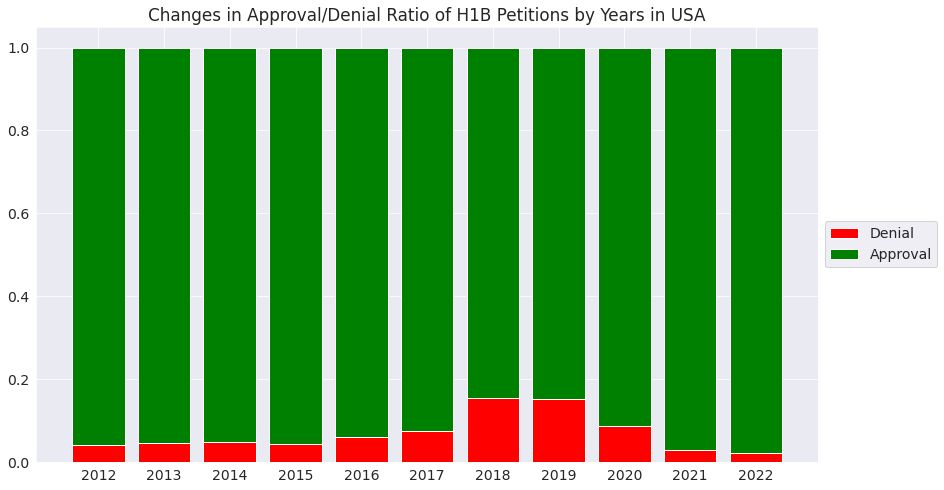

In [54]:
plt.bar(approved_denied_years.index, approval_denial_ratio[:, 1], color='red')
plt.bar(approved_denied_years.index, approval_denial_ratio[:, 0], color='green', bottom=approval_denial_ratio[:, 1])
plt.legend(['Denial', 'Approval'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Changes in Approval/Denial Ratio of H1B Petitions by Years in USA")
plt.xticks(fiscal_years);

**Observation:<br>
The approval rate is pretty high once an employer files a H-1B petition for you. We see an unusually high number of petitions getting denied in 2018-2019. Was it related to Trump H-1B's policy? Nevertheless, USCIS have been rejecting fewer applications in recent years.**

**Question: Which industries filed most of the H1-B visa petitions that are getting approved? Here, I want to look at what it looks like without including the most recent year.**

In [96]:
combined_h1b_exclu_recent = combined_h1b_data[combined_h1b_data['Fiscal Year'] != fiscal_years[-1]]

In [97]:
Num_Industries = combined_h1b_exclu_recent['NAICS'].unique().size
Total_petitions_approved = combined_h1b_exclu_recent['AP'].sum()

In [98]:
# Grouped by Industries & summing up total approved petitions
approved_by_industry = combined_h1b_exclu_recent.groupby(by='NAICS')['AP'].sum().nlargest(Num_Industries)
approved_by_industry_percent = (approved_by_industry / Total_petitions_approved) * 100
approved_by_industry_percent.iloc[:10]

NAICS
Professional, Scientific, and Technical Services                            58.083101
Manufacturing                                                                9.721047
Educational Services                                                         6.703323
Information                                                                  6.231467
Finance and Insurance                                                        6.073241
Health Care and Social Assistance                                            4.040633
Retail Trade                                                                 3.441937
Wholesale Trade                                                              0.921019
Administrative and Support and Waste Management and Remediation Services     0.893472
Unknown                                                                      0.763470
Name: AP, dtype: float64

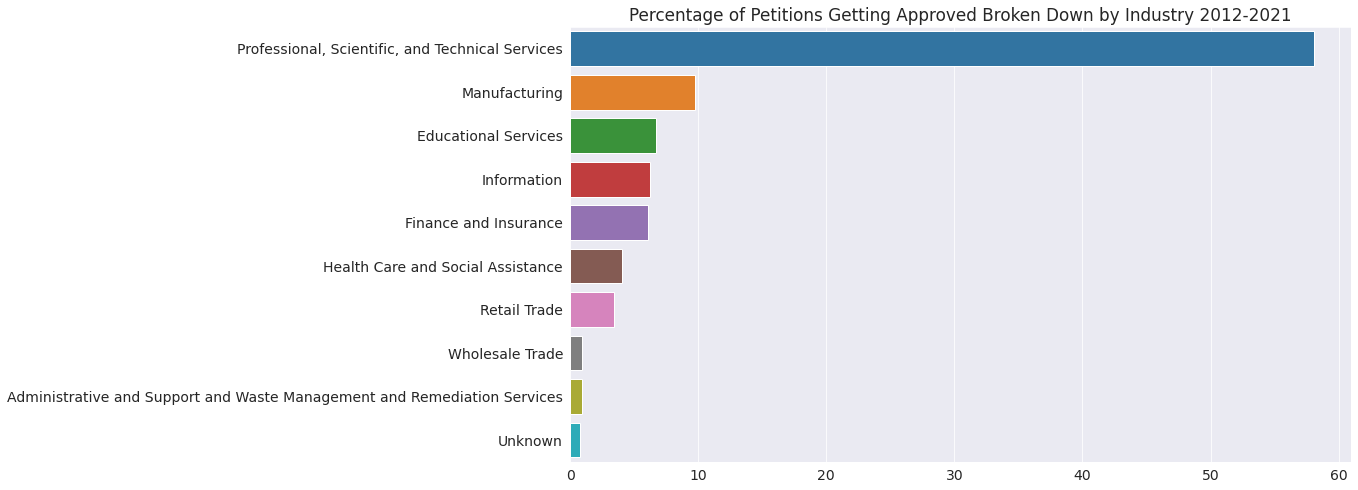

In [111]:
num_industries_show = 10
start_yr, end_yr = fiscal_years[0], fiscal_years[-2]
sns.barplot(x=approved_by_industry_percent.values[:num_industries_show], y=approved_by_industry_percent.index[:num_industries_show])
plt.title(f"Percentage of Petitions Getting Approved Broken Down by Industry {start_yr}-{end_yr}");
plt.ylabel("");

In [100]:
top4_industries = 4
top4_percent = approved_by_industry_percent.iloc[:top4_industries].sum()
print(f"Top {top4_industries} industries capture(s) {round(top4_percent, 2)}% of all applications filed")

Top 4 industries capture(s) 80.74% of all applications filed


**Observation: <br>
Over the last decade, STEM occupations alone represents a staggering 56% of all approved applications, followed by Manufacturing, Education, and Information. These top 4 industries captures a total of 80.74% of all approved applications.** 

**Question: In which states are the applications getting approved?**

In [101]:
"""
    For compact display, let's just see the top 25 states
"""
num_states_show = 25

In [102]:
# Group by state & sum up the total approved applications
approved_by_state = combined_h1b_exclu_recent.groupby(by='State')['AP'].sum().nlargest(num_states_show)
approved_by_state_percent = (approved_by_state / Total_petitions_approved) * 100

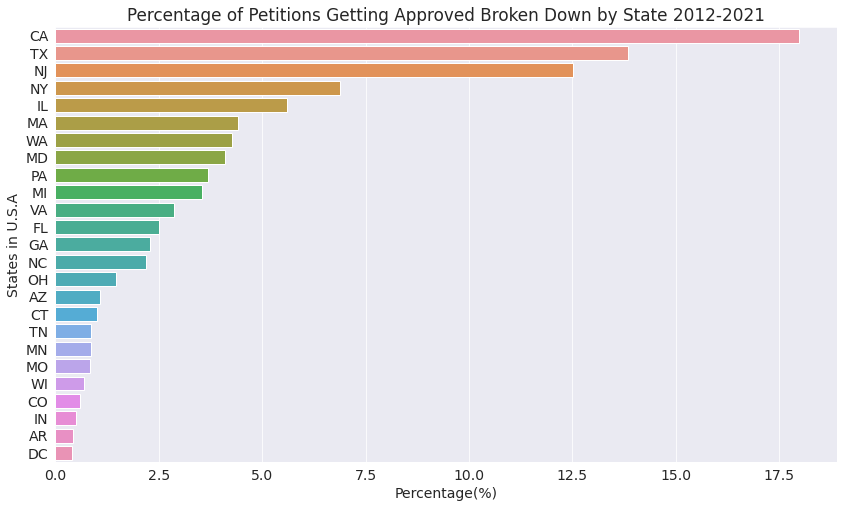

In [112]:
sns.barplot(x=approved_by_state_percent.values, y=approved_by_state_percent.index)
start_yr, end_yr = fiscal_years[0], fiscal_years[-2]
plt.title(f"Percentage of Petitions Getting Approved Broken Down by State {start_yr}-{end_yr}")
plt.xlabel("Percentage(%)")
plt.ylabel("States in U.S.A");

**Observation:<br>
California, Texas, New Jersey, and New York represents about half of the applications approved in the country.**

**Question: Show some popular cities in those top states for H-1B applicants?**

In [103]:
top_states = approved_by_state_percent.index[:4].values
top_states

array(['CA', 'TX', 'NJ', 'NY'], dtype=object)

In [104]:
num_cities = 12

In [105]:
top_cities = combined_h1b_exclu_recent[combined_h1b_exclu_recent['State'].isin(top_states)].groupby(['State', 'City'])['AP'].sum().nlargest(num_cities)

In [106]:
top_cities

State  City           
NY     NEW YORK           174135
TX     COLLEGE STATION    136500
       PLANO               97175
CA     SAN FRANCISCO       85614
       SAN JOSE            68338
NJ     EDISON              63525
       EAST BRUNSWICK      62386
CA     SUNNYVALE           56941
TX     HOUSTON             52916
       DALLAS              48429
CA     SANTA CLARA         40593
TX     RICHARDSON          39897
Name: AP, dtype: int64

In [107]:
labels = [city + ',' + state for state, city in top_cities.index]
explode = []
for i in range(num_cities):
    if i < 3:
        explode.append(0.1)
    else:
        explode.append(0)

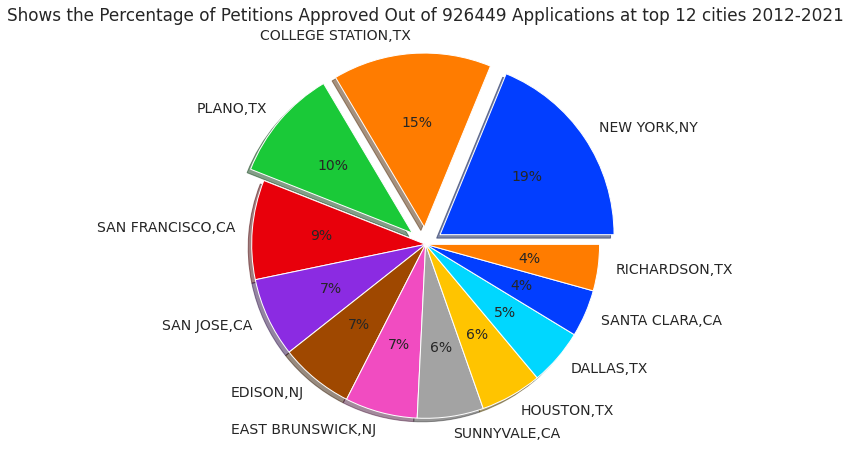

In [113]:
plt.pie(top_cities, labels=labels,  colors=sns.color_palette('bright'), shadow=True, autopct="%.0f%%", explode=explode)
start_yr, end_yr = fiscal_years[0], fiscal_years[-2]
plt.title(f"Shows the Percentage of Petitions Approved Out of {top_cities.sum()} Applications at top {num_cities} cities {start_yr}-{end_yr}");

Let us save and upload our work to Jovian before continuing

In [114]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/h1b-visa-petitions" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kyawhtetwin/h1b-visa-petitions


'https://jovian.ai/kyawhtetwin/h1b-visa-petitions'

# Part 2: Recent Year Analysis For Comp Sci Student in LA

In this section, I want to explore more about the most recent year to inform the decision of a recent international comp sci grad student in LA (That's me! 😃).



#### Q1: In the United States, what's the total number of applications approved in 2022 & where are the H1-B visa applications filed? How much has the total number of applications filed in 2022 changed from last year?

In [115]:
Year = fiscal_years[-1]

In [116]:
h1b_2022 = combined_h1b_data[combined_h1b_data['Fiscal Year'] == Year].copy()

In [ ]:
total_approved_app = h1b_2022['AP'].sum()
print(f"Total number of applications approved in {Year}: {total_approved_app}")

In [ ]:
total_approved_app_2021 = combined_h1b_data[combined_h1b_data['Fiscal Year'] == 2021]['AP'].sum()
change = round(((total_approved_app_2021-total_approved_app)/total_approved_app_2021)*100, 2)
print(f"The total number of approved applications in {Year} have dropped by {change}% from last year")

The total number of approved applications in 2022 have dropped by 29.4% from last year


In [ ]:
total_approved_by_state = h1b_2022.groupby('State')['AP'].sum().reset_index()

In [ ]:
!pip install plotly-express --upgrade --quiet

In [137]:
import plotly.express as px

fig = px.choropleth(total_approved_by_state, 
                   locations='State', 
                   locationmode="USA-states", 
                   scope="usa", 
                   color="AP",
                   color_continuous_scale="Viridis_r")
fig.update_layout(
    title=f'Accumulated Number of Approved H1-B Applications Across State in Year {Year}',
    coloraxis_colorbar_title_text="Approved Petitions"
    
)
fig.show()

**Observation:<br>
In 2022, if we look at the distribution of approved applications by State, we see a similar picture from the last decade with states like California, Texas, and New Jersey etc.. capturing a significant share. 2022 has seen a decline in total petitions as we saw earlier & in fact the decline in approved applications has dropped by a whopping 30% from last year!**

#### Q2:  Let's explore the industries wtih most approved applications. How has the picture changed in 2022, if any, from recent years? What percentage of approved applications comes from top 4 industries?

In [122]:
Num_Industries = h1b_2022['NAICS'].unique().size
Total_petitions_approved = h1b_2022['AP'].sum()

In [123]:
# Group by industries & sum their approved applications
approved_by_industry = h1b_2022.groupby(by='NAICS')['AP'].sum().nlargest(Num_Industries)
approved_by_industry_percent = (approved_by_industry / Total_petitions_approved) * 100
approved_by_industry_percent.iloc[:5]

NAICS
Professional, Scientific, and Technical Services    44.201715
Manufacturing                                       11.542016
Information                                         10.686434
Finance and Insurance                                9.328830
Retail Trade                                         7.648371
Name: AP, dtype: float64

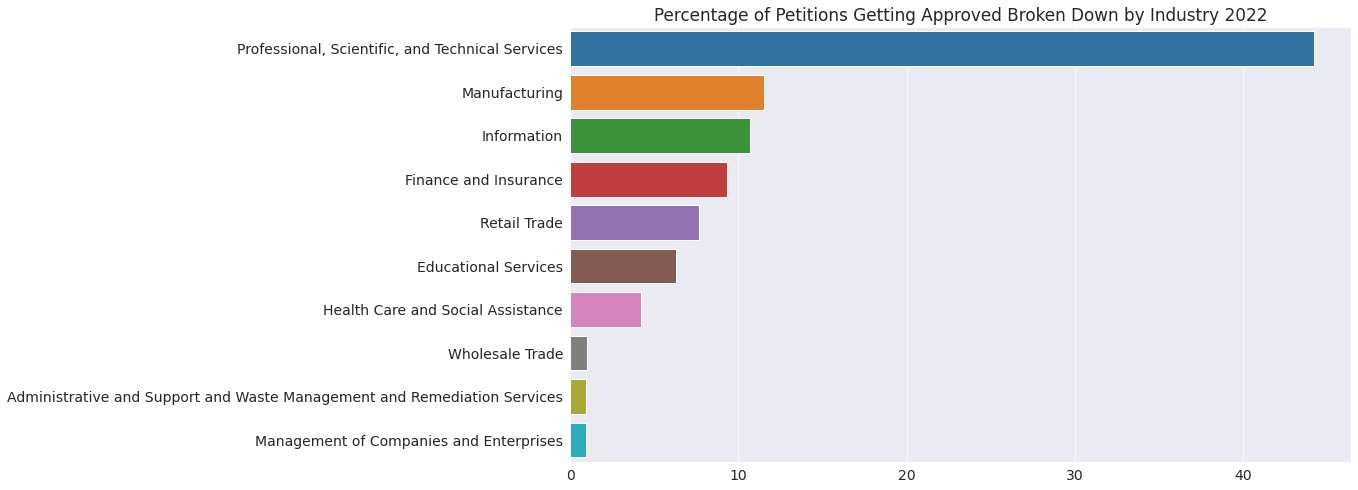

In [124]:
num_industries_show = 10
sns.barplot(x=approved_by_industry_percent.values[:num_industries_show], y=approved_by_industry_percent.index[:num_industries_show])
plt.title(f"Percentage of Petitions Getting Approved Broken Down by Industry {Year}");
plt.ylabel("");

In [125]:
top4_industries = 4
top4_percent = approved_by_industry_percent.iloc[:top4_industries].sum()
print(f"Top {top4_industries} industries capture(s) {round(top4_percent, 2)}% of all applications filed")

Top 4 industries capture(s) 75.76% of all applications filed


**Observation:<br>
The picture is the same if we break it down by industry with the top four industries capturing 75.76%.**

#### Q3: I am interested in living in CA, TX, and NY. So, let's zoom in a bit to look at the top cities in those states.

In [126]:
states = np.array(['CA', 'TX', 'NY']) 

In [127]:
num_cities = 20
top_cities = h1b_2022[h1b_2022['State'].isin(states)].groupby(['State', 'City'])['AP'].sum().nlargest(num_cities)

In [128]:
cities = [city for _, city in top_cities.index]

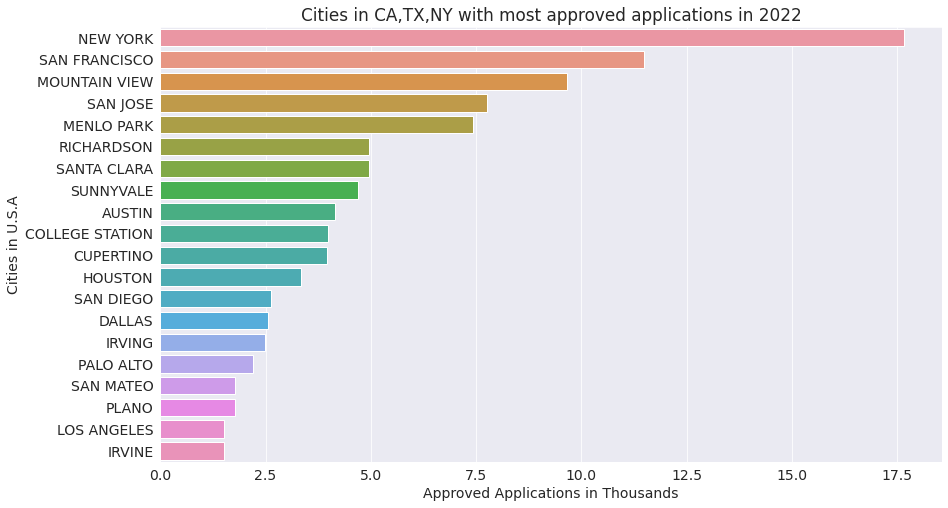

In [129]:
sns.barplot(x=top_cities.values/1000, y=cities)
plt.title(f"Cities in {','.join(states)} with most approved applications in {Year}")
plt.xlabel("Approved Applications in Thousands")
plt.ylabel("Cities in U.S.A");

**Observation: The top cities for H-1B petitions applicants haven't really changed much as these popular cities continue to attract most applicants although there have been some changes in the order of the cities.**

#### Q4: In these top cities that I am interested in the states mentioned above, I am mostly interested in STEM jobs. So, let's see the top 30 employers

In [131]:
h1b_2022_stem = h1b_2022[h1b_2022['City'].isin(cities)]
h1b_2022_stem = h1b_2022_stem[h1b_2022_stem['NAICS'] == 'Professional, Scientific, and Technical Services']
num_employers = 30
city_employers_df = h1b_2022_stem.groupby(['City', 'Employer'])['AP'].sum().nlargest(num_employers).reset_index()
city_employers_df

,City,Employer,AP
0,MOUNTAIN VIEW,GOOGLE LLC,6843
1,RICHARDSON,INFOSYS LIMITED,3901
2,COLLEGE STATION,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,3731
3,SUNNYVALE,HCL AMERICA INC,2019
4,SAN FRANCISCO,SALESFORCE COM INC,1756
5,SAN FRANCISCO,UBER TECHNOLOGIES INC,882
6,PALO ALTO,VMWARE INC,768
7,NEW YORK,MPHASIS CORPORATION,672
8,MOUNTAIN VIEW,INTUIT INC,649
9,NEW YORK,MCKINSEY COMPANY INC UNITED STATES,637


**Observation:<br> I see a good amount of tech companies here. Any suprises?**

#### Q5: Before I start packing to move to other cities, let me check the employers in my current cities so that I could check their career page for potential software development jobs

In [132]:
current_city = 'LOS ANGELES'
num_employers = 20
h1b_2022_stem[h1b_2022_stem['City']=='LOS ANGELES'].groupby('Employer')['AP'].sum().nlargest(num_employers).reset_index()

,Employer,AP
0,AECOM TECHNICAL SERVICES INC,50
1,RIOT GAMES INC,38
2,GIBSON DUNN & CRUTCHER LLP,14
3,MACIAS GINI & O CONNELL LLP,14
4,SINGERLEWAK LLP,14
5,MAGNITE INC,11
6,VIDEOAMP INC,11
7,KORN FERRY US,10
8,TERASAKI INST FOR BIOMEDICAL INNOVATION,9
9,SHEIN TECHNOLOGY LLC,8


**Observation: <br> I don't know much about these companies. I gotta do more research but I suspect they don't have a lot of demand for software developer in particular.**

#### Q6: To ensure that I don't go for the wrong employers, let's see which employers in STEM field at these cities has mostly have their H1-B petitions denied. How bad are the numbers?

In [133]:
num_employers = 15
city_employers_df = h1b_2022_stem.groupby(['City', 'Employer'])['DP'].sum().nlargest(num_employers).reset_index()
city_employers_df

,City,Employer,DP
0,MOUNTAIN VIEW,GOOGLE LLC,67
1,SUNNYVALE,HCL AMERICA INC,64
2,COLLEGE STATION,COGNIZANT TECHNOLOGY SOLUTIONS US CORP,51
3,RICHARDSON,INFOSYS LIMITED,50
4,NEW YORK,MCKINSEY COMPANY INC UNITED STATES,14
5,SAN FRANCISCO,UBER TECHNOLOGIES INC,14
6,SAN FRANCISCO,SALESFORCE COM INC,13
7,SAN JOSE,ADOBE INC,12
8,PALO ALTO,VMWARE INC,11
9,IRVING,SCOTTLINE LLC,10


**Observation: <br>Some what suprising. I expected a different list. But it makes sense since these companies tend to file for a lot of H-1B Visa Petitions. Perhaps, it's less about the employers.**

Let us save and upload our work to Jovian before continuing.

In [134]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/h1b-visa-petitions" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kyawhtetwin/h1b-visa-petitions


'https://jovian.ai/kyawhtetwin/h1b-visa-petitions'

## Inferences and Conclusion

Over the last decade (2012-2022), USCIS has received and processed on average of about 380,000 H-1B visa applications per year. While the total number of petitions have been on the rise for most of the decade, peaking at 2021, the number of petitions have fallen below the decade average in 2022 and we saw it significantly drop by almost 30% from last year (Caution: Since the analysis is done in December of 2022, we don't have all the data for 2022 fiscal year). If I were to speculate based on the recent news of massive layoffs, especially in technical field, I wouldn't be surprised if I see two-digits percentage drop in the numbers from last year. 

In general, the approval rate of H-1B visa applications is pretty good (typically around 95%) except for 2018 and 2019 when it was much closer 85%. Perhaps, this was related to Donald Trump's policy on H-1B program. 

When it comes to industry, Professional, Scientific, and Technical Services (i.e. STEM occupations) have the highest demand for H-1B applicants, accounting for about 56% of all total approved applications from 2012 to 2021 and about half of all total approved applications in 2022. Manufacturing and Information sector also have high demand, representing more than 20% of all total approved applications over the decade.

Moreover, if we break down the H-1B petitions by state, the four most popular states are California, Texas, New Jersey(Anybody surprised?), and New York in that order. In addition, New York City, San Francisco, Mountain View, San Jose,and Menlo Park top the list of cities where H-1B applications are approved in 2022. 

In [138]:
import jovian

In [139]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/h1b-visa-petitions" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kyawhtetwin/h1b-visa-petitions


'https://jovian.ai/kyawhtetwin/h1b-visa-petitions'

## References 

Useful Resources:<br>
1. [Original Dataset](https://www.uscis.gov/tools/reports-and-studies/h-1b-employer-data-hub/h-1b-employer-data-hub-files)
2. Numpy
3. Pandas 
4. Matplotlib, Seaborn & Plotly

In [140]:
import jovian

In [142]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "kyawhtetwin/h1b-visa-petitions" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/kyawhtetwin/h1b-visa-petitions


'https://jovian.ai/kyawhtetwin/h1b-visa-petitions'